In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

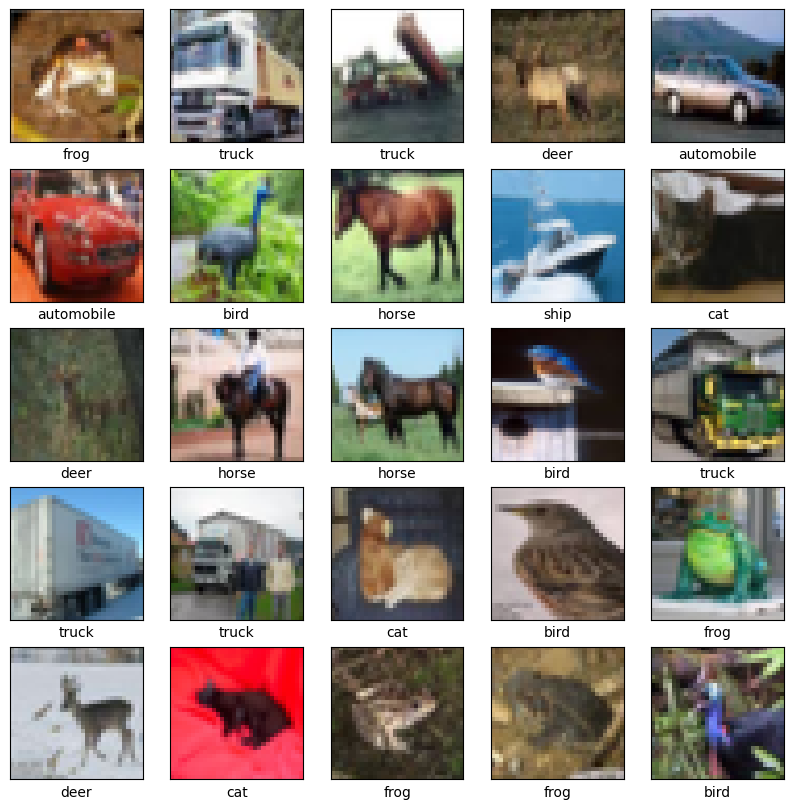

In [17]:
# Verify the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5282 - accuracy: 0.4446 - val_loss: 1.2742 - val_accuracy: 0.5453
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1641 - accuracy: 0.5876 - val_loss: 1.0991 - val_accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0265 - accuracy: 0.6385 - val_loss: 1.0504 - val_accuracy: 0.6327
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9297 - accuracy: 0.6730 - val_loss: 0.9239 - val_accuracy: 0.6780
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8612 - accuracy: 0.6976 - val_loss: 0.9210 - val_accuracy: 0.6804
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7997 - accuracy: 0.7188 - val_loss: 0.8878 - val_accuracy: 0.6848
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7554 - accuracy: 0.7333 - val_loss: 0.8810 -

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 4s - loss: 0.8864 - accuracy: 0.7076 - 4s/epoch - 11ms/step

Test accuracy: 0.7075999975204468


In [11]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

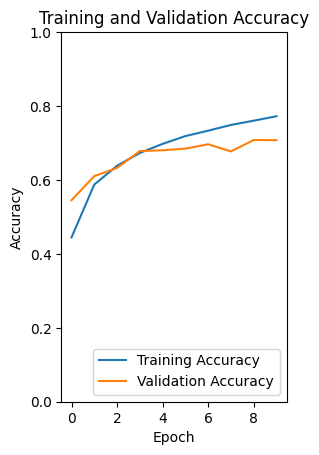

In [18]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

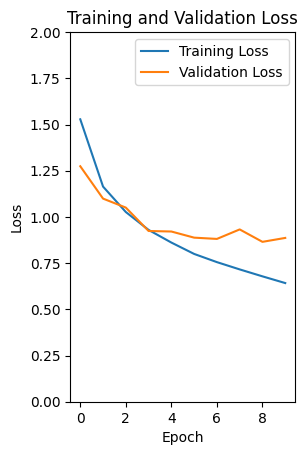

In [13]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

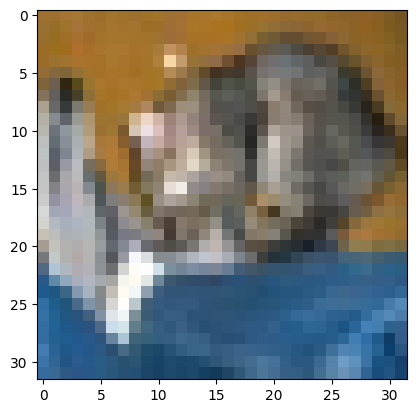

1/1 [==============================] - 0s 21ms/step
Predicted label: cat
True label: cat


In [19]:
# Predict on a single image
img_index = 0
img = test_images[img_index]
plt.imshow(img)
plt.show()

img = np.expand_dims(img, axis=0)  # Add the batch dimension
predictions = model.predict(img)
predicted_label = np.argmax(predictions)
print(f"Predicted label: {class_names[predicted_label]}")
print(f"True label: {class_names[test_labels[img_index][0]]}")

313/313 [==============================] - 5s 15ms/step


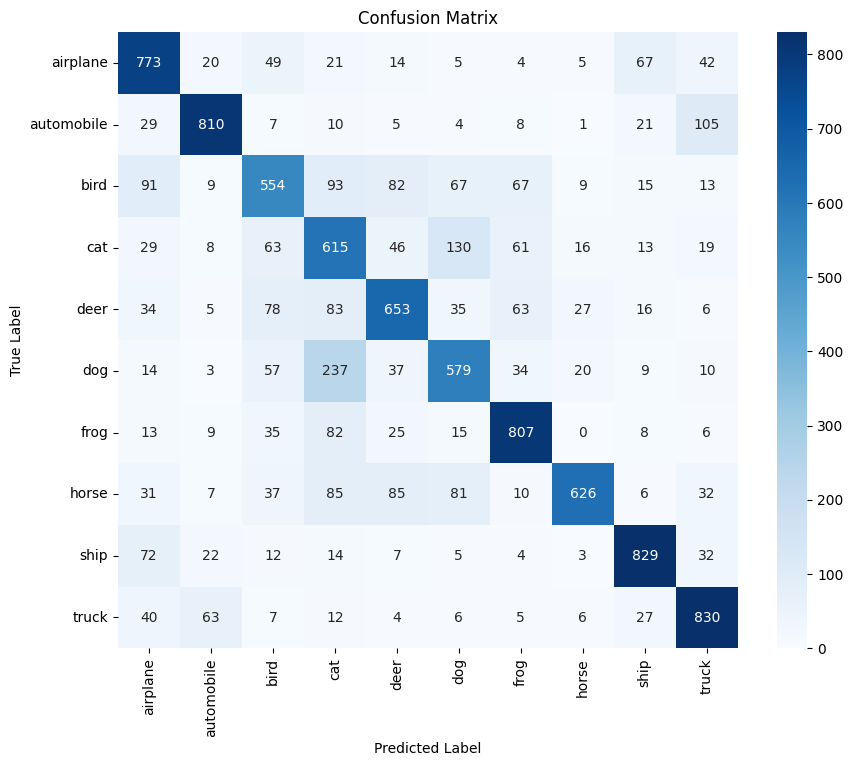

In [20]:
# Confusion Matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels.flatten()

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()